**Neural Network - A Simple Perceptron**

Q1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

-  Deep Learning is a subset of machine learning, and a branch of artificial intelligence (AI), that utilizes multi-layered artificial neural networks—modeled loosely on the human brain—to automatically learn complex patterns from raw, unstructured data.

Q2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

-  A perceptron is the simplest form of an artificial neural network used for binary classification tasks, capable of distinguishing between two classes of data. Its primary limitation is that it can only solve linearly separable problems.

Q3.Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

-  Activation functions are critical, non-linear functions in neural networks that determine if a neuron should activate, enabling models to learn complex, non-linear patterns. They introduce non-linearity into the network, prevent gradient issues, and allow for efficient backpropagation, mapping inputs to desired output ranges.

Q4.What is the difference between Loss function and Cost function in neural networks? Provide examples.

-  In neural networks, the loss function measures the penalty or error for a single training example, whereas the cost function is the average of these loss values across the entire training dataset (or a mini-batch). Essentially, the loss function evaluates a single prediction, and the cost function evaluates the model’s overall performance, used to guide optimization.

Q5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

-  Optimizers in neural networks are algorithms that update model weights and biases to minimize loss, acting as the engine for learning. They determine how quickly and effectively a model converges by navigating the loss landscape, crucial for handling complex, non-convex, and high-dimensional data.

In [1]:
#Q6.Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

# AND gate dataset
# Inputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Targets
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0.0
learning_rate = 0.1
epochs = 10

# Activation function (step function)
def activation(z):
    return 1 if z >= 0 else 0

# Training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = activation(z)

        # Perceptron learning rule
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        print(f"Input: {X[i]}, Target: {y[i]}, Prediction: {y_pred}")

    print(f"Weights: {weights}, Bias: {bias}\n")

# Testing
print("Testing trained perceptron:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    prediction = activation(z)
    print(f"Input: {X[i]} -> Output: {prediction}")

Epoch 1
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 0
Weights: [0.1 0.1], Bias: 0.0

Epoch 2
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 0, Prediction: 1
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 0
Weights: [0.2 0.1], Bias: -0.1

Epoch 3
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 1
Input: [1 0], Target: 0, Prediction: 1
Input: [1 1], Target: 1, Prediction: 0
Weights: [0.2 0.1], Bias: -0.20000000000000004

Epoch 4
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 1
Weights: [0.2 0.1], Bias: -0.20000000000000004

Epoch 5
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 1
Weights: [0.2 0.1], B

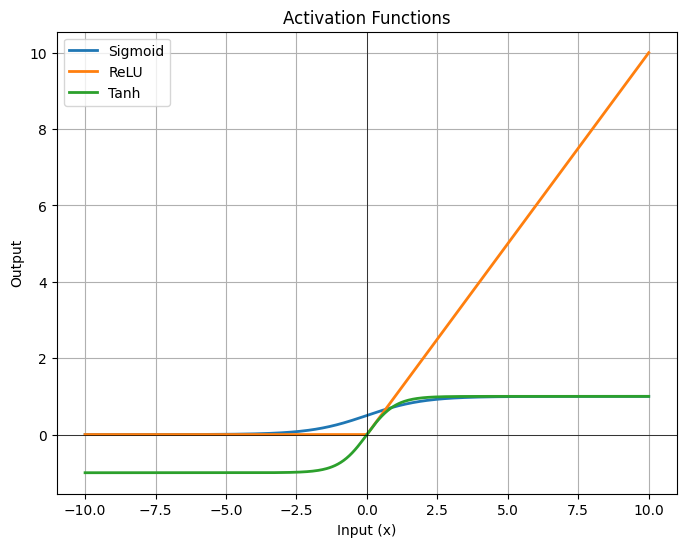

In [2]:
#Q7.Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-10, 10, 400)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot
plt.figure(figsize=(8, 6))

plt.plot(x, y_sigmoid, label="Sigmoid", linewidth=2)
plt.plot(x, y_relu, label="ReLU", linewidth=2)
plt.plot(x, y_tanh, label="Tanh", linewidth=2)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title("Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)

plt.show()

In [3]:
#Q8.Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data (0–255 -> 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    verbose=1
)

# Print training accuracy
train_accuracy = history.history["accuracy"][-1]
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8782 - loss: 0.4264
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9629 - loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9770 - loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9833 - loss: 0.0560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9875 - loss: 0.0419

Training Accuracy: 98.60%


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7713 - loss: 0.6611 - val_accuracy: 0.8484 - val_loss: 0.4258
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8567 - loss: 0.3984 - val_accuracy: 0.8522 - val_loss: 0.4040
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8738 - loss: 0.3506 - val_accuracy: 0.8691 - val_loss: 0.3654
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8814 - loss: 0.3220 - val_accuracy: 0.8827 - val_loss: 0.3307
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8901 - loss: 0.3037 - val_accuracy: 0.8685 - val_loss: 0.3642
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8962 - loss: 0.2794 - val_accuracy: 0.8790 - val_loss: 0.3380
Epoch 7/10
1500/1500 ━━━━━━━━━

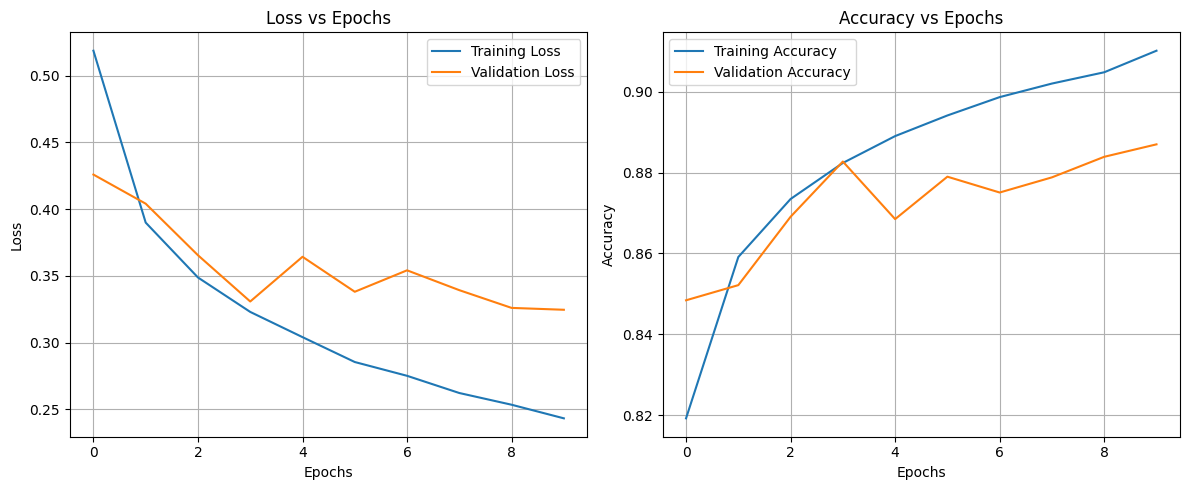

In [4]:
#Q9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Plot Loss and Accuracy curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Q10. You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate. Explain your real-time data science workflow: ● How would you design a deep learning model (perceptron or multilayer NN)? ● Which activation function and loss function would you use, and why? ● How would you train and evaluate the model, considering class imbalance? ● Which optimizer would be suitable, and how would you prevent overfitting?

-  1. Model Design: The Multilayer Perceptron (MLP)
A simple Perceptron won’t cut it because fraud patterns are non-linear and involve complex interactions between features (e.g., a specific "transaction amount" might only be suspicious in a "specific location").

Input Layer: Features like scaled transaction amount, one-hot encoded merchant IDs, and embeddings for location.

Hidden Layers: 3–4 dense layers. We start wide and gradually narrow them (e.g., 128 → 64 → 32 neurons) to compress the features into meaningful representations.

Output Layer: A single neuron with a Sigmoid activation function to output a probability between 0 and 1.

2. Functions: The "Brain" and the "Judge"
Activation Function: I’d use ReLU (Rectified Linear Unit) for hidden layers. It prevents the vanishing gradient problem and is computationally efficient for real-time systems.

Loss Function: Binary Cross-Entropy (BCE) is standard, but given the imbalance, I’d use Weighted Binary Cross-Entropy or Focal Loss.

Why? These functions penalize the model more heavily for misclassifying the minority class (fraud), forcing the "brain" to pay more attention to those rare cases.

3. Training & Evaluation: Handling the Imbalance
In fraud detection, a model that predicts "Legitimate" 100% of the time might be 99.9% accurate but is actually useless.

Data Resampling: I would use SMOTE (Synthetic Minority Over-sampling Technique) on the training set to create "fake" fraud examples, or simply undersample the majority class to balance the scales.

Evaluation Metrics: Ignore Accuracy. Focus on:

Precision-Recall AUC: Better for imbalanced data than ROC-AUC.

Recall (Sensitivity): We want to catch as much fraud as possible.

F1-Score: The harmonic mean to ensure we aren't flagging every transaction as fraud (which would annoy customers).

4. Optimization & Overfitting Prevention
Optimizer: Adam is the go-to. It uses an adaptive learning rate, which helps the model converge faster on the noisy patterns of fraud data.

Preventing Overfitting:

Dropout: Randomly "turning off" neurons during training (around 20-30%) so the model doesn't become over-reliant on specific features.

Early Stopping: Stop training the moment the validation loss stops improving to prevent the model from memorizing the training set.

Batch Normalization: Keeps the inputs to each layer stable, speeding up training and adding a slight regularization effect.